In [85]:
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
from skimage import exposure as ex
from scipy.ndimage import morphology

In [2]:
ST = nb.load('ST_c.nii')
SM = nb.load('SM_c.nii')
SV = nb.load('SV_c.nii')

In [4]:
ST_np = ST.get_fdata()
SM_np = SM.get_fdata()
SV_np = SV.get_fdata()

In [74]:
print(ST_np.shape)

(229, 218, 193)


In [33]:
ST2 = np.where(ST_np>10., 1., 0.)
SM2 = np.where(SM_np>10., 2., 0.)
SV2 = np.where(SV_np>10., 3., 0.)

In [80]:
print(ST2[:,:,100].sum(),SM2[:,:,100].sum()/2,SV2[:,:,100].sum()/3)

889.0 325.0 2515.0


In [55]:
a = np.array([[0,0],[1,1],[0,0],[0,1]])
b = np.array([2,0,0,0,2,0,0])
c = np.array([0,3,0,0,0,3,3])

print(a.flatten())

[0 0 1 1 0 0 0 1]


In [39]:
combined1 = ST2 + SM2
combined1 = np.where(combined1==3, 1, combined1)

In [41]:
combined2 = combined1 + SV2
combined2 = np.where(combined2==4, 1, combined2)
combined2 = np.where(combined2==5, 2, combined2)

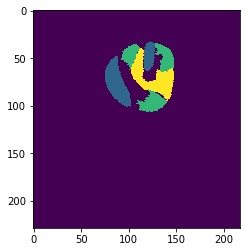

In [97]:
plt.imshow(combined2[:,:,122])

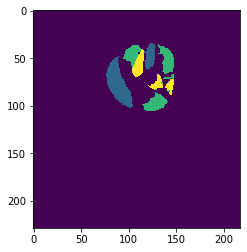

In [96]:
plt.imshow(asdf[:,:,121])

In [44]:
print(combined2.min())

0.0


In [78]:
hist = [0,0,0,0]
temp = combined2[:,:,100].flatten()
for i in range(temp.size):
    if temp[i]==0:
        hist[0]+=1
    elif temp[i]==1:
        hist[1]+=1
    elif temp[i]==2:
        hist[2]+=1
    elif temp[i]==3:
        hist[3]+=1

[46211, 889, 325, 2497]


<BarContainer object of 3 artists>

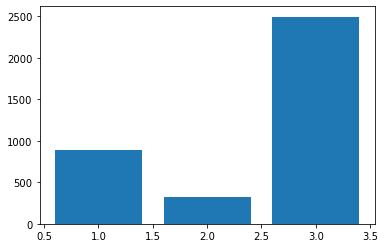

In [79]:
print(hist)
plt.bar([1,2,3], hist[1:])